### SUPERVISED & UNSUPERVISED LEARNING, DECISION-TREE CLASSIFICATION FOR CIFAR10 DATASET

In [ ]:
import torch
import torchvision
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import precision_score, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset from torchvision
transform = torchvision.transforms.ToTensor()
cifar = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


100%|██████████| 170498071/170498071 [00:03<00:00, 49386597.11it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assigning all the input features of variables; converting it to numpy array and float data type
InputData = np.array(cifar.data, dtype=float)
# Similarly processing for Target labels of CIFAR dataset
LabelData = np.array(cifar.targets, dtype=int)

# Reshaping the input features into a 2D array; where the number of rows is the same as the original InputData
# and the number of columns is determined automatically based on the size of each input sample.
InputData_reshaped = InputData.reshape(InputData.shape[0], -1)

# In above InputData_reshaped where each row is an instance/sample col is feature/attribute

# Spliting the dataset into training set and test set
# here 20% will be used for testing and 80% for training

# X_train : training data , y_train: training labels , X_test: testing data, y_test: testing labels
X_train, X_test, y_train, y_test = train_test_split(InputData_reshaped, LabelData, test_size=0.2, random_state=42)

# Create a decision tree classifier with max_depth=15 if we leave it blank it will
# make the whole decison tree but generally will do overfitting
DecisionTree_classifier = DecisionTreeClassifier(max_depth=15)

# Fit the model on the training set/ basically training the model
DecisionTree_classifier.fit(X_train, y_train)

# Evaluating the accuracy on training set
train_score = DecisionTree_classifier.score(X_train, y_train)

# Evaluating the accuracy on test set
test_score = DecisionTree_classifier.score(X_test, y_test)

print("Training accuracy:", train_score)
print("Test accuracy:", test_score)



Training accuracy: 0.905125
Test accuracy: 0.2425


**We Observe Overfitting**

we see a high training accuracy of 0.905125, indicating that the decision tree is able to predict the training data with a high level of accuracy. However, the test accuracy is significantly lower at 0.2425, suggesting that the model is not performing well on unseen data. This discrepancy between the training and test accuracy is a clear indication of overfitting. The decision tree is likely memorizing the training data, including its noise and specific characteristics, rather than capturing the general patterns that would enable it to make accurate predictions on new, unseen data.

### PLOTTING **GRAPH** AND CONFUSION MATRIX FOR THE ABOVE OBSERVATION

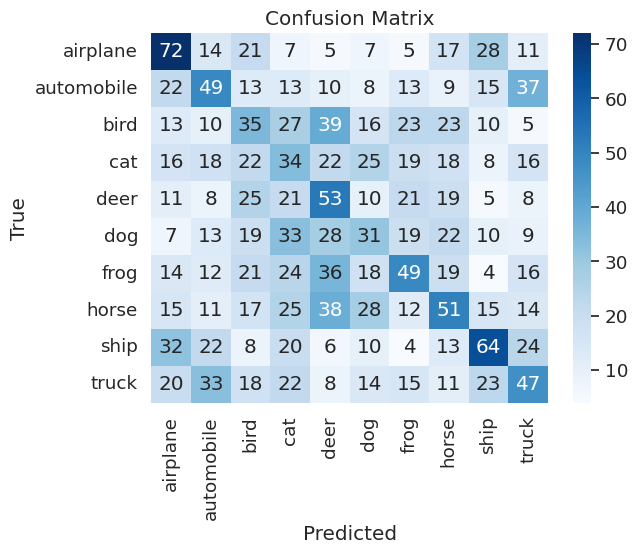

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = DecisionTree_classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


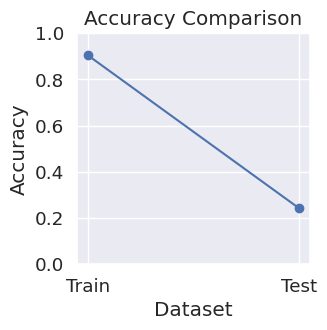

In [ ]:
# Plotting the accuracy graph
plt.figure(figsize=(3, 3))
plt.plot([train_score, test_score], marker='o')
plt.xticks([0, 1], ['Train', 'Test'])
plt.ylim([0, 1])
plt.title("Accuracy Comparison")
plt.xlabel("Dataset")
plt.ylabel("Accuracy")
plt.show()

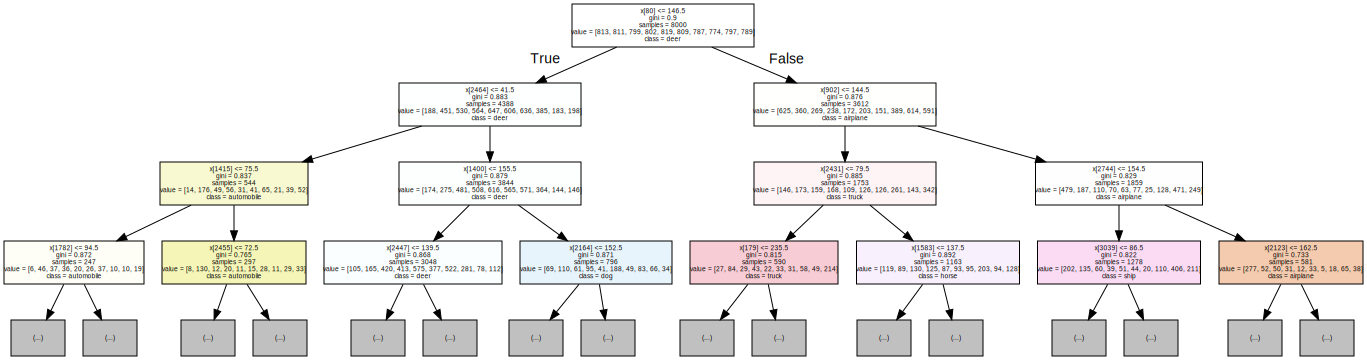

In [ ]:
import graphviz
#Plotting the Decison Tree
dot_data = tree.export_graphviz(DecisionTree_classifier,
                                out_file=None,
                                feature_names=None,
                                class_names=labels,
                                filled=True,
                                max_depth=3)

dot_data = dot_data.replace('graph [', 'graph [size="13,13", fontsize=2,')
dot_data = dot_data.replace('node [', 'node [fontsize=6.5,')

graph = graphviz.Source(dot_data)
graph.render(filename='decision_tree', view=False, format='png')
graph


Model's accuracy: 0.2425
Recall: 0.24389842829550878
Precision: 0.24381789289457237
F1 Score: 0.24243715062942311


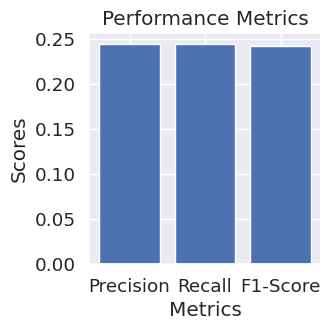

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = DecisionTree_classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print evaluation metrics
print("Model's accuracy:", test_score)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

# Create a bar plot of precision, recall, and F1-score
metrics = ['Precision', 'Recall', 'F1-Score']
scores = [precision, recall, f1]
plt.figure(figsize=(3, 3))
plt.bar(metrics, scores)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Metrics')
plt.show()


### HYPERPARAMETER TUNING FOR DECISION TREES

Now we try Hyperparameter tuning to get more accuracy on test set.
**Hyperparameter tuning,** also known as hyperparameter optimization, is the process of finding the best set of hyperparameters for a machine learning model. Hyperparameters are parameters that are not learned from the data but are set before training the model. They control the behavior and performance of the model.

**max_depth:** It represents the maximum depth of the decision tree. A higher value can result in a more complex and overfitted tree, while a lower value can lead to underfitting. It's important to find an optimal depth that balances model complexity and generalization.

**min_samples_split:** It specifies the minimum number of samples required to split an internal node. A higher value can prevent overfitting by creating more general nodes, while a lower value can result in a more complex tree.

**min_samples_leaf:**  It sets the minimum number of samples required to be at a leaf node. Similar to min_samples_split, a higher value promotes generalization, while a lower value allows more specific leaves.

**max_features:** It determines the number of features to consider when looking for the best split. It can be set to a specific number, a fraction of the total features, or "sqrt" or "log2" to use the square root or logarithm of the total features, respectively.

**criterion:** It specifies the function to measure the quality of a split. The commonly used criteria are "gini" for Gini impurity and "entropy" for information gain.

In [ ]:
# import numpy as np
# from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import accuracy_score
# import torchvision
# from torchvision import transforms


# Define the hyperparameters to tune
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=DecisionTree_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Training the model with best fits
best_model.fit(X_train, y_train)
# Predict on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

y_pred_train = best_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Print the best hyperparameters and model performance
print("Best Hyperparameters:", best_params)
print("Accuracy on training data:", accuracy_train)
print("Accuracy on test data:", accuracy)


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy on training data: 0.304875
Accuracy on test data: 0.2665


**Here overfitting has greatly reduced! but still accuracy is low.**

The best hyperparameters for the decision tree model are: max_depth = 5, min_samples_leaf = 1, and min_samples_split = 2. These hyperparameters were obtained through hyperparameter tuning, which aims to find the optimal values for the model parameters.

After tuning the hyperparameters, we evaluated the performance of the model on both the training and test datasets. The accuracy on the training data is 0.304875, which means that the model correctly predicted the class labels for approximately 30.48% of the instances in the training set.

On the other hand, the accuracy on the test data is 0.2665, indicating that the model achieved an accuracy of approximately 26.65% on unseen data. This lower accuracy on the test data suggests that the model may be overfitting to the training data.

***`note` WE HAVE IMPLEMENTED DECISION TREE CLASSFIER USING HOG WHICH INCREASES THE PERFORMANCE METRICS SIGNIFICANTLY PLEASE LOOK FOR THE FILE** https://github.com/Markermav/AI_Project_G22/blob/main/Decision_Tree_Hog.ipynb



## SEMI SUPERVISED LEARNING CLASSIFICATION ON DECISION TREE

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert your input features and target labels to numpy arrays
X = np.array(cifar.data, dtype=float)
y = np.array(cifar.targets, dtype=int)

# Reshape the input features
X_reshaped = X.reshape(X.shape[0], -1)

# Split the data into labeled and unlabeled instances basically not mentioning the class label
X_labeled, X_unlabeled, y_labeled, _ = train_test_split(X_reshaped, y, test_size=0.8, random_state=42)

# Adjust the sizes of labeled and unlabeled datasets
num_samples = min(len(X_labeled), len(X_unlabeled))
X_labeled = X_labeled[:num_samples]
y_labeled = y_labeled[:num_samples]
X_unlabeled = X_unlabeled[:num_samples]

# Split the labeled data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)

# Train the model on the labeled training data
clf.fit(X_train, y_train)

# Make predictions on the labeled training data
y_train_pred = clf.predict(X_train)

# Calculate accuracy on the labeled training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the validation data
y_val_pred = clf.predict(X_val)

# Calculate accuracy on the validation data
val_accuracy = accuracy_score(y_val, y_val_pred)

# Split the data into training set and test set
X_train_final = np.concatenate((X_labeled, X_unlabeled))
y_train_final = np.concatenate((y_labeled, np.full(len(X_unlabeled), -1)))

X_test, _, y_test, _ = train_test_split(X_train_final, y_train_final, test_size=0.2, random_state=42)

# Train the model on the combined labeled and unlabeled data
clf.fit(X_train_final, y_train_final)

# Make predictions on the test data
y_test_pred = clf.predict(X_test)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print("Training set accuracy: {:.4f}".format(train_accuracy))
print("Test set accuracy: {:.4f}".format(test_accuracy))



Training set accuracy: 0.3769
Test set accuracy: 0.5281


**Semi-supervised learning model and performance metrics**

Semi-supervised learning involves training a model using both labeled and unlabeled data to improve performance. In this case of using a decision tree for semi-supervised learning on the CIFAR-10 dataset we achieved good precision on test but it still may imply some level of overfitting happened cause we trained our model twice.
IF we see below performance metrics; it appears that the model's performance is relatively low, with low recall, moderate precision, and a low F1 score. This implies that the model is struggling to correctly identify positive instances and may be biased towards negative instances. It would be advisable to further evaluate and improve the model's performance by considering techniques such as adjusting classification thresholds, exploring different architectures, or increasing the amount of training data.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model's accuracy: 0.528125
Recall: 0.1504352602814881
Precision: 0.4101759668907319
F1 Score: 0.15885247230884858


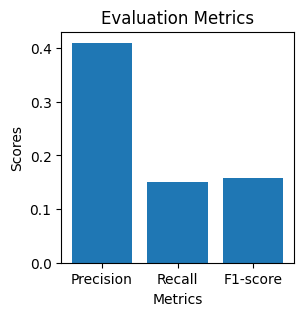

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')
# Print evaluation metrics
print("Model's accuracy:", test_accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

# Create a bar plot of precision, recall, and F1-score
metrics = ['Precision', 'Recall', 'F1-score']
scores = [precision, recall, f1]
plt.figure(figsize=(3, 3))
plt.bar(metrics, scores)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Evaluation Metrics')
plt.show()


**Observations and Explanation:**

*Here we see a increase in model's accuracy while performing semi supervised learning but Recall and F1 score are quite low which is not good for our model.*

The input features (X) and target labels (y) are converted to numpy arrays.
The input features are reshaped to have a 2D shape, where each row represents an image.
The data is split into labeled and unlabeled instances, with a test size of 80% and a random state of 42.
The labeled data is further split into training and validation sets, with a test size of 20% and a random state of 42.
A decision tree classifier is created with specified hyperparameters such as maximum depth, minimum samples split, and minimum samples leaf.
The model is trained on the labeled training data using the fit method.
Predictions are made on the labeled training data and validation data using the predict method.
Accuracy scores are calculated for the training and validation data using the accuracy_score function.
The data is concatenated to create a combined labeled and unlabeled training set.
The combined training set is split into a final training set and a test set, with a test size of 20% and a random state of 42.
The model is trained on the combined labeled and unlabeled data.
Predictions are made on the test data using the predict method.
Accuracy score is calculated for the test data using the accuracy_score function.
The accuracy scores for the training set and test set are printed.

## EXPERIMENTING

**We introduced a Random Forest Classifier to check if we could achive more accuracy on semi supervised learning Calssification**

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert your input features and target labels to numpy arrays
X = np.array(cifar.data, dtype=float)
y = np.array(cifar.targets, dtype=int)

# Reshape the input features if needed
X_reshaped = X.reshape(X.shape[0], -1)

# Split the data into training set, validation set, and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Hyperparameter tuning
best_score = 0
best_model = None
for max_depth in range(1, 16):
    for n_estimators in range(10, 101, 10):
        model = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators)
        model.fit(X_train, y_train)
        val_score = model.score(X_val, y_val)
        if val_score > best_score:
            best_score = val_score
            best_model = model



Using the Random Forest Classifier model to calculate performance metrics.

In [8]:
# Evaluate the best model on labeled data
y_pred_labeled = best_model.predict(X_train_val)
accuracy_labeled = accuracy_score(y_train_val, y_pred_labeled)
precision_labeled = precision_score(y_train_val, y_pred_labeled, average='macro')
recall_labeled = recall_score(y_train_val, y_pred_labeled, average='macro')
f1_score_labeled = f1_score(y_train_val, y_pred_labeled, average='macro')

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')
f1_score_test = f1_score(y_test, y_pred_test, average='macro')

# Print the results
print("Labeled data accuracy:", accuracy_labeled)
print("Labeled data precision:", precision_labeled)
print("Labeled data recall:", recall_labeled)
print("Labeled data F1 score:", f1_score_labeled)
print()
print("Test set accuracy:", accuracy_test)
print("Test set precision:", precision_test)
print("Test set recall:", recall_test)
print("Test set F1 score:", f1_score_test)

# Evaluate the best model on the validation set
y_pred_val = best_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print()
# Print the validation set accuracy
print("Validation set accuracy:", accuracy_val)


Labeled data accuracy: 0.881
Labeled data precision: 0.8820607613013735
Labeled data recall: 0.8809238922628818
Labeled data F1 score: 0.880952291974946

Test set accuracy: 0.4025
Test set precision: 0.40244499446282544
Test set recall: 0.40311676693170473
Test set F1 score: 0.3976003470033353

Validation set accuracy: 0.420625
